# Pardwy i Wilcy

W zadaniu wykorzystamy błądzenie losowe z dryfrem, tzn.
$$ X_t = \delta + X_{t-1} + \epsilon_t,$$
gdzie:
- $\delta$ - parametr dryfu
- $\epsilon$ - zmienna losowa o rozkładznie $N(0,\sigma^2)$

In [3]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def generujZkola():
    r = random.random()
    alpha = random.uniform(0, 2*math.pi)
    return r*math.cos(alpha), r*math.sin(alpha)

In [26]:
T = 0 #czas
R = 1 #rozdzielczosc czasu

In [27]:
class Zwierzak:
    def __init__(self):
        self.xy = np.array(generujZkola())
        self.dryf = np.zeros(2)
        self.plec = random.choice(['man', 'woman'])
        
    def odleglosc(self, other):
        return np.sqrt(np.sum(self.xy**2))
    
    def kierunek(self, other):
        wektor = other.xy - self.xy
        norma = odleglosc(wektor)
        return np.divide(wektor, norma)
        
    def move(self):
        if self.niewola <= 0:
            B = math.sqrt(R)*np.random.randn(2)
            self.xy += self.dryf + B
            self.dryf = np.zeros(2) # czyszczenie dryfu na następną iterację
        else:
            self.niewola -= 1

In [123]:
class Pardwa(Zwierzak):
    H_ODDALANIE_SAMCOW = 2
    H_PORODU = 2
    H_UCIECZKI = 2
    
    def __init__(self):
        Zwierzak.__init__(self)
        self.niewola = random.expovariate(1/70)
        
    def oddalanie(self, other):
        odl = self.odleglosc(other)
        if self.plec == 'man' and other.plec == 'man' and odl <= H_ODDALANIE_SAMCOW:
            self.dryf -= 3/odl * kierunek(self, other)  
            
    def zaloty(self, other):
        odl = self.odleglosc(other)
        if self.plec == 'woman' and other.plec == 'man' and odl <= H_PORODU:
            self.dryf += kierunek(other)
        elif self.plec == 'man' and other.plec == 'woman' and odl <= H_PORODU:
            self.dryf += 1.5*kierunek(other)
        # rodzenie
        
    def ucieczka(self, other):
        if type(other) == Wilk:
            odl = self.odleglosc(ohter)
            if odl <= H_UCIECZKI:
                self.dryf += -0.9*self.kierunek(other)
            elif odl <= H_UCIECZKI/10:
                pass #self.kill()
                
    def kill(self):
        pass

In [131]:
class Wilk(Zwierzak):
    H_ZBLIZANIA = 2
    H_ODDALANIA_ALPHA = 2
    H_PORODU = 2
    
    def __init__(self):
        Zwierzak.__init__(self)
        self.niewola = random.expovariate(1/200)
        self.alpha = random.random() <= 0.05
        
    def oddalanie(self, other):
        odl = self.odleglosc(other)
        if not self.alpha and not other.alpha and odl >= H_ZBLIZANIA:
            "Dążenie zwykłych wilków do siebie."
            self.dryf += 0.1*self.kierunek(other)*(odl - 0.1)
        elif not self.alpha and other.alpha:
            "Dążenie zwykłych wilków do alph."
            self.dryf += 0.15*self.kierunek(other)
        elif self.alpha and self.plec == other.plec and odl <= H_ODDALANIA_ALPHA:
            "Taka sama płeć alph."
            self.dryf += -self.kierunek(other)
            
    def zaloty(self, other):
        if self.plec == 'man' and other.plec == 'woman':
            self.dryf += 0.3*self.kierunek(other)
            odl = self.odleglosc(other)
            if odl <= H_PORODU:
                #porod
                pass
            
            
    def polowanie(self, other):
        if type(other) == Pardwa:
            odl = self.odleglosc(other)
            self.dryf += self.kierunek(other)*(1 + min(0.3, 3/odl**2))

In [128]:
a = Pardwa()
b = Pardwa()
a.odleglosc(b)

0.40514093030584342

In [9]:
class Simulation:
    def __init__(self, n_pardwy, n_wilcy):
        self.popPardw = [Pardwa() for _ in range(n_pardwy)]
        self.popWilcy = [Wilk() for _ in range(n_wilcy)]
        
    def move(self):
        """ Przesuniecie wszystkich zwierzaczków. """
        for pardwa in self.popPardw:
            pardwa.move(2)
        for wilk in self.popWilcy:
            wilk.move(2)
               
    def show(self):
        """ Plotowanie wszystkiego. """
        #Pardwy
        xPardwy = []
        yPardwy = []
        for pardwa in self.popPardw:
            xPardwy.append(pardwa.xy[0])
            yPardwy.append(pardwa.xy[1])

        #Wilcy
        xWilcy = []
        yWilcy = []
        for wilk in self.popWilcy:
            xWilcy.append(wilk.xy[0])
            yWilcy.append(wilk.xy[1])
        

        plt.figure(figsize = (10,10))
        plt.axis([-1, 1, -1, 1])
        
        plt.scatter(xPardwy, yPardwy, c = 'b')
        plt.scatter(xWilcy, yWilcy, c = 'r')
        
        plt.xticks([])
        plt.yticks([])
        plt.show()

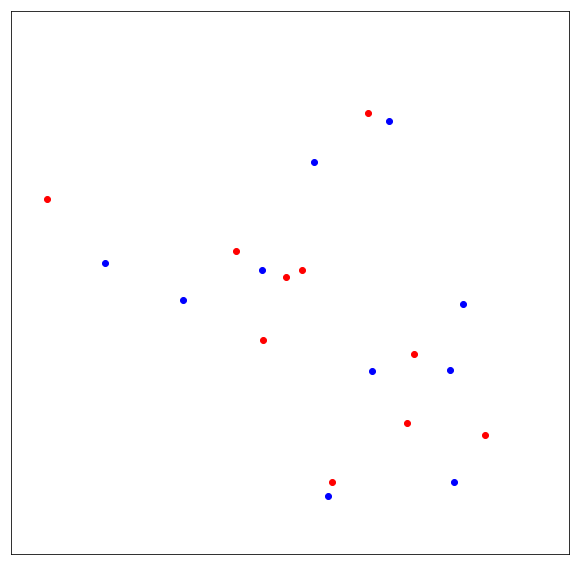

In [10]:
s = Simulation(10,10)
s.show()

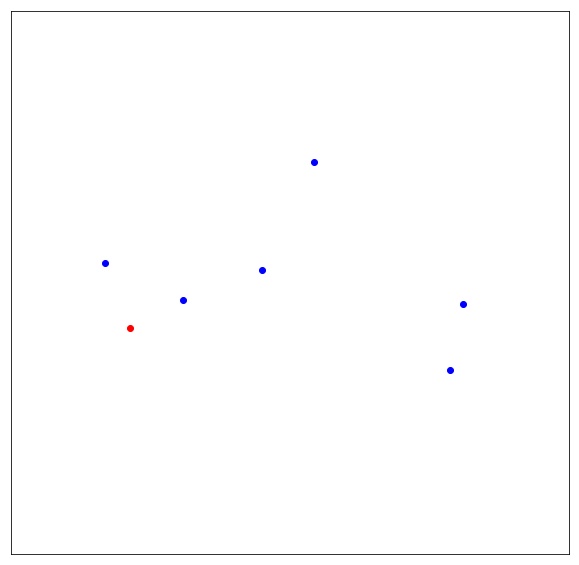

In [24]:
s.move()
s.show()